# 文本分析的基本概念

跟我们之前介绍的分析不同，文本数据是典型的非结构化数据，而且本身具有非常复杂的结构，相对之前的数据分析相比有其特有的分析技巧。这里我们将简单介绍文本分析的基本流程以及一些基础的工具。

虽然差别很大，但是基本流程与之前的分析还是想通的，一般都需要如下步骤：

1. 准备数据，在这一步除了要准备需要进行分析的数据之外，可能还需要准备额外的语料库（corpus）。
2. 文本规范化处理，也就是我们之前清洗数据的步骤，比如分词、去除停用词、去除特殊符号等无意义字符、同义词转换、缩写转换等等。
3. 特征工程，从已经清洗好的数据中提取特征。由于计算机只能处理数值型的变量，因而在这一步有一个比较关键的步骤是将文字转换为计算机可以理解的向量等数值型变量。
4. 训练模型，经过这些步骤后，针对不同的目的，模型训练可能与之前的算法比较类似，但是也有针对文本数据特有的模型。
5. 模型评价，评价模型的性能，重复以上步骤，改进模型。

针对文本数据，除了其他数据同样可以进行的相关性计算、聚类、分类等模型之外，还有一些任务是文本数据特有的，比如：

* 分词
* 词性标注
* 词嵌入
* 摘要和主题建模
* 实体识别
* 知识图谱
* 语义分析
* ......

其中有的模型结果是其他模型的基础，比如分词、词性标注等是很多其他模型的基础。

在本节，我们将主要使用Python中的**NLTK**（http://www.nltk.org ）、**Scikit-Learn**、**Jieba**（https://github.com/fxsjy/jieba ）、**Gensim**（https://github.com/RaRe-Technologies/gensim ）等工具介绍文本分析的基本原理。不过与此同时，自然语言处理，包括中文的自然语言处理正在蓬勃发展，很多新的工具可以使用，比如对标NLTK并且号称有更好性能的**spaCy**（ https://spacy.io ），以及已经经过预训练可以直接拿来用的模型比如最近如火如荼的**BERT**（）、**HanLP**（https://github.com/hankcs/HanLP ）、**Stanford CoreNLP**（https://github.com/stanfordnlp/CoreNLP ）等等，学习基本原理后可以直接使用这些包进行自己的研究。

我们首先从文本的规范化处理开始，介绍文本分析的基本原理和方法。

# 文本规范化

文本是典型的非结构化数据，我们需要将文本转换为高度结构化的数据，首先要对文本进行有意义的划分，一般涉及到句子的**切分**（**tokenization**）以及其他清洗步骤。

**标识**（**token**）是文本的有意义的最小成分，文本处理的最简单操作即将文本切成一个个的token，通常包括句子切分和词语切分。接下来我们很少有研究句子的成分和语义，更多时候是针对词语的分析，因而接下来主要介绍句子的切分方法。

## 英文切分

英文的词语切分一般比较简单，主要原因是因为英文的单词之间都有空格进行分割，而中文的切分就复杂很多。常见的自然语言处理包比如NKTL以及spaCy都肯定包含了切分的函数，比如在NLTK中：

In [1]:
sentence="I am working very hard to help New York City & State. Dealing with both Mayor & Governor and producing tremendously for them, including four new medical centers and four new hospitals. Fake News that I won’t help them because I don’t like Cuomo (I do). Just sent 4000 ventilators!"
sentence

'I am working very hard to help New York City & State. Dealing with both Mayor & Governor and producing tremendously for them, including four new medical centers and four new hospitals. Fake News that I won’t help them because I don’t like Cuomo (I do). Just sent 4000 ventilators!'

In [2]:
from nltk import word_tokenize

words=word_tokenize(sentence)
print(words)

['I', 'am', 'working', 'very', 'hard', 'to', 'help', 'New', 'York', 'City', '&', 'State', '.', 'Dealing', 'with', 'both', 'Mayor', '&', 'Governor', 'and', 'producing', 'tremendously', 'for', 'them', ',', 'including', 'four', 'new', 'medical', 'centers', 'and', 'four', 'new', 'hospitals', '.', 'Fake', 'News', 'that', 'I', 'won', '’', 't', 'help', 'them', 'because', 'I', 'don', '’', 't', 'like', 'Cuomo', '(', 'I', 'do', ')', '.', 'Just', 'sent', '4000', 'ventilators', '!']


注意运行以上命令可能先要下载相应的包：在Python解释器中运行：nltk.download('punkt') ，如果提示错误，可以参考：https://www.cnblogs.com/sddai/p/10543359.html

当然NLTK不止支持这一种切分方法，比如我们可以使用正则表达式切分：

In [3]:
from nltk import RegexpTokenizer

Tokenizer=RegexpTokenizer(pattern=r"[\w\-’']+")
words=Tokenizer.tokenize(sentence)
print(words)

['I', 'am', 'working', 'very', 'hard', 'to', 'help', 'New', 'York', 'City', 'State', 'Dealing', 'with', 'both', 'Mayor', 'Governor', 'and', 'producing', 'tremendously', 'for', 'them', 'including', 'four', 'new', 'medical', 'centers', 'and', 'four', 'new', 'hospitals', 'Fake', 'News', 'that', 'I', 'won’t', 'help', 'them', 'because', 'I', 'don’t', 'like', 'Cuomo', 'I', 'do', 'Just', 'sent', '4000', 'ventilators']


此外还可以使用空白字符（空格、缩进、换行）等进行切分：

In [4]:
from nltk import WhitespaceTokenizer

Tokenizer=WhitespaceTokenizer()
words=Tokenizer.tokenize(sentence)
print(words)

['I', 'am', 'working', 'very', 'hard', 'to', 'help', 'New', 'York', 'City', '&', 'State.', 'Dealing', 'with', 'both', 'Mayor', '&', 'Governor', 'and', 'producing', 'tremendously', 'for', 'them,', 'including', 'four', 'new', 'medical', 'centers', 'and', 'four', 'new', 'hospitals.', 'Fake', 'News', 'that', 'I', 'won’t', 'help', 'them', 'because', 'I', 'don’t', 'like', 'Cuomo', '(I', 'do).', 'Just', 'sent', '4000', 'ventilators!']


英文分词虽然原理简单，但是还是有很多细节的坑，比如上面Trump先生的「don’t」和「don't」，如果在切分或者其他清洗步骤中予以重视，计算机会认为这是两个词。

## 中文分词

中文文本分析与英文的文本分析一个最重要的区别在于，英文使用空格分割每个单词，但是中文没有分割单词的概念。

为了克服这个问题，分词就应运而生了。结合字典和算法，分词软件可以帮助我们将中文的文章、句子分解为一个个的中文单词。

目前已经有很多成熟的分词工具，比如中科院的NLPIR汉语分词系统、结巴分词以及腾讯、阿里、百度的分词系统等等。在这里我们以开源的结巴分词为例，介绍分词工具的用法。

为了使用结巴分词，首先需要安装。在terminal中输入：
```shell
pip install jieba
```

就可以进行安装了。安装好之后，可以将jieba模块导入到Python程序中，就可以正常使用了：
```shell
import jieba
```

比如，最简单的用法：

In [5]:
import jieba
line="今年以来，我国持续推进减税降费、提高最低工资标准、促进就业，特别是年初开始实施的个人所得税改革以及专项附加扣除方案，有效增加了居民可支配收入。与此同时，不断消除居民消费的后顾之忧。消费需求进一步释放，消费市场亮点纷呈"
wlist=jieba.cut(line)
print(list(wlist))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.524 seconds.
Prefix dict has been built successfully.


['今年以来', '，', '我国', '持续', '推进', '减税', '降费', '、', '提高', '最低工资', '标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人所得税', '改革', '以及', '专项', '附加', '扣除', '方案', '，', '有效', '增加', '了', '居民', '可', '支配', '收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费', '需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


cut()函数有三个参数：必须要提供的是需要进行分词的字符串；此外，cut_all参数控制是否采用全模式；HMM参数用来控制是否使用HMM模型。其区别是：

* cut_all=True， 代表使用全模式，全模式可以切出混合不同粒度的词
* HMM=True，代表使用HMM模型，用于推断字典中没有的词

比如：

In [6]:
wlist=jieba.cut(line, cut_all=True)
print(list(wlist))

['今年', '今年以来', '以来', '，', '我国', '持续', '推进', '减税', '降', '费', '、', '提高', '最低', '最低工资', '低工资', '工资', '工资标准', '标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人', '个人所得', '个人所得税', '所得', '所得税', '税改', '改革', '以及', '专项', '附加', '扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配', '支配', '收入', '。', '与此', '与此同时', '同时', '，', '不断', '消除', '居民', '居民消费', '消费', '的', '后顾之忧', '。', '消费', '需求', '求进', '进一步', '一步', '释放', '，', '消费', '消费市场', '市场', '亮点', '纷呈']


In [7]:
wlist=jieba.cut(line, HMM=True)
print(list(wlist))

['今年以来', '，', '我国', '持续', '推进', '减税', '降费', '、', '提高', '最低工资', '标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人所得税', '改革', '以及', '专项', '附加', '扣除', '方案', '，', '有效', '增加', '了', '居民', '可', '支配', '收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费', '需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


In [8]:
wlist=jieba.cut(line, HMM=True, cut_all=True)
print(list(wlist))

['今年', '今年以来', '以来', '，', '我国', '持续', '推进', '减税', '降', '费', '、', '提高', '最低', '最低工资', '低工资', '工资', '工资标准', '标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人', '个人所得', '个人所得税', '所得', '所得税', '税改', '改革', '以及', '专项', '附加', '扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配', '支配', '收入', '。', '与此', '与此同时', '同时', '，', '不断', '消除', '居民', '居民消费', '消费', '的', '后顾之忧', '。', '消费', '需求', '求进', '进一步', '一步', '释放', '，', '消费', '消费市场', '市场', '亮点', '纷呈']


可以看到，上面的分词结果......一言难尽。实际上，任何分词算法都不可避免的不能跟上时代的潮流，特别是网络时代，新的词语层出不穷，而在一些专业领域中，一些专有名词往往普通词典无法完全覆盖。比如“减费降税”、“可支配收入”这些专有名词，都没有被正确分出来。

为了克服这个问题，往往需要用户自己添加字典。比如，我们可以把“减费降税”、“可支配收入”这些名词放在一个文本文件中，每个新词写成一行，然后使用load_userdict()函数给定这个文件，就可以添加自己的新词列表：

In [9]:
with open('user_dict.txt','wt') as f:
    f.write("减税降费\n可支配收入\n最低工资\n最低工资标准\n专项附加扣除\n消费需求")
jieba.load_userdict('user_dict.txt')
wlist=jieba.cut(line)
print(list(wlist))

['今年以来', '，', '我国', '持续', '推进', '减税降费', '、', '提高', '最低工资标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人所得税', '改革', '以及', '专项附加扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


载入了用户字典后，新的分词更加准确了。在实际应用的时候，无论使用什么分词工具，用户字典的构建往往是非常关键的。

## 大小写转换

主要针对英文等字母文字，一般的做法是统一转换为小写字母，避免出现「FAKE NEWS$\neq$fake news」的情况出现。可以使用字符串的.lower()方法很容易的完成大小写转换：

In [10]:
words=[w.lower() for w in words]
print(words)

['i', 'am', 'working', 'very', 'hard', 'to', 'help', 'new', 'york', 'city', '&', 'state.', 'dealing', 'with', 'both', 'mayor', '&', 'governor', 'and', 'producing', 'tremendously', 'for', 'them,', 'including', 'four', 'new', 'medical', 'centers', 'and', 'four', 'new', 'hospitals.', 'fake', 'news', 'that', 'i', 'won’t', 'help', 'them', 'because', 'i', 'don’t', 'like', 'cuomo', '(i', 'do).', 'just', 'sent', '4000', 'ventilators!']


## 删除停用词和特殊字符

分词之后，在进一步进行处理之前，消除停用词和特殊符号往往是非常关键的。比如在上面的分词结果中，“的”、“是”、“与此同时”等，含义并不是非常明显，对其分析的意义不大，留着这些词只会空占内存，并且可能对分析结果产生巨大影响。一个常用的做法是，使用一个停用词列表，分词结束之后，把停用词列表中的词全都剔除出去。

比如，在文本文档“chinese_cutting/stopword.txt”中，我们列举出了一些常用的停用词以及特殊字符，我们可以使用如下方法消除停用词：

In [11]:
with open('Chinese_cutting/stopword.txt','rt') as f:
    stoplist=f.readlines()
    stoplist=set([w.lower() for w in stoplist])
wlist=jieba.cut(line)
wlist=[w.lower() for w in wlist if w not in stoplist]
print(wlist)

['今年以来', '，', '我国', '持续', '推进', '减税降费', '、', '提高', '最低工资标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个人所得税', '改革', '以及', '专项附加扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


注意上面的函数里面我们还同时对停用词和词语转换为了小写。

## 扩展缩写词、同义词转换

缩写词即诸如：「isn't==is not」之类的缩写，一般而言也需要特殊处理。一般来说我们可以通过定义一个映射关系来处理这种情况，比如：

In [12]:
syno={"isn't": "is not",
     "aren't": "are not",
     "i'll": "i will",
     "个人所得税":"个税"}
wlist=[syno[w]  if w in syno.keys() else w for w in wlist]
print(wlist)

['今年以来', '，', '我国', '持续', '推进', '减税降费', '、', '提高', '最低工资标准', '、', '促进', '就业', '，', '特别', '是', '年初', '开始', '实施', '的', '个税', '改革', '以及', '专项附加扣除', '方案', '，', '有效', '增加', '了', '居民', '可支配收入', '。', '与此同时', '，', '不断', '消除', '居民消费', '的', '后顾之忧', '。', '消费需求', '进一步', '释放', '，', '消费市场', '亮点', '纷呈']


此外，还有一些更加细致的工作，比如检查拼写错误、矫正重复字符等等，此外英文可能还涉及到时态、单复数的问题，这些都需要大量细致的工作，特别是针对不同的应用场景进行特定的优化是非常有必要的。

## 一个简单的例子：中文词频统计

以下实现了对《越女剑》的词频统计：

In [13]:
import jieba

## 停用词
with open('Chinese_cutting/stopword.txt','rt') as f:
    stoplist=f.readlines()
    stoplist=[w.lower().strip() for w in stoplist]
## 读入小说
wordlist=[]
with open('Chinese_cutting/越女剑.txt','rt') as f:
    for l in f:
        line_cut=jieba.cut(l)
        line=[w.strip().lower() for w in line_cut]
        wordlist.extend(line)
wordlist=[w for w in wordlist if w not in stoplist]
## 统计
text_dict=dict()
for l in wordlist:
    if l not in text_dict:
        text_dict[l]=1
    else:
        text_dict[l]+=1
text_freq=[]
for k in text_dict:
    text_freq.append((k,text_dict[k]))
## 排序
text_freq.sort(key=lambda x: x[1],reverse=True)
## 用pandas显示，更好看
import pandas as pd
freq=pd.DataFrame(text_freq, columns=['word','frequency'])
freq.head(10)

,word,frequency
0,范蠡,118
1,道,113
2,剑士,105
3,青衣,47
4,阿青,47
5,勾践,44
6,锦衫,35
7,长剑,34
8,说道,31
9,吴国,30


# 提取特征

由于计算机只能处理数值变量进行运算，在文本数据清洗完毕后，接下来通常需要将其转换为计算机可以识别的向量。目前有多重方法可以完成这项任务，我们在这里主要介绍其中常见的三种：词袋、TF-IDF以及词嵌入三种模型。

## 词袋模型

**词袋**（**bag of words**）模型是最基础的一种将文本数据结构化为向量的一种方法。实际上词袋可以简单理解为每个文本的词频统计。比如，我们接下来使用一些上市公司的标题数据，并使用上面介绍的方法将每个标题转换为向量：

In [14]:
import pandas as pd

RAW=pd.read_csv("csv/stocknews1.csv")
RAW['date']=pd.to_datetime(RAW['date'])
RAW.head(10)

,id,date,title
0,59021767,2011-02-19,沪争取增值税扩围改革试点
1,59021769,2011-02-19,周小川：外部施压不会影响人民币升值步伐
2,59021771,2011-02-19,准备金率再上调 达到19.5％创新高
3,59021772,2011-02-19,浙江亚太药业股份有限公司股票2011年02月14日2011年02月18日二级市场表现周简报
4,59021774,2011-02-19,定基价格指数若涨20% 政府或出手调控
5,59021776,2011-02-19,政策倾斜和加大投入 西藏将做大做强藏药产业
6,59021778,2011-02-19,新疆13个地州探矿权年 590个项目涉嫌“圈而不探”
7,59021779,2011-02-19,沪士电子股份有限公司股票2011年02月14日2011年02月18日二级市场表现周简报
8,59021783,2011-02-19,北京：楼市限购首日成交环比降9成
9,59021787,2011-02-19,上海：房管局发布“沪九条”限购执行细则


这里我们额外进行一些处理，注意到其中的类似「2011年02月14日2011年02月18日二级市场表现周简报」之类的title很没有营养，我们打算去除他，可以使用正则表达式方便的达到目的：

In [15]:
jianbao=RAW['title'].str.match(r'.+\d{4}年\d{2}月\d{2}日.+简报')
RAW1=RAW.iloc[list(~jianbao),:]
RAW1

,id,date,title
0,59021767,2011-02-19,沪争取增值税扩围改革试点
1,59021769,2011-02-19,周小川：外部施压不会影响人民币升值步伐
2,59021771,2011-02-19,准备金率再上调 达到19.5％创新高
4,59021774,2011-02-19,定基价格指数若涨20% 政府或出手调控
5,59021776,2011-02-19,政策倾斜和加大投入 西藏将做大做强藏药产业
...,...,...,...
1134769,19839999,2006-12-27,定价基准不同 新利率基准将冲击旧浮动利率债
1134770,19840000,2006-12-27,债市延续调整格局 投资者宜缩短投资久期
1134771,19840023,2006-12-27,曾培炎:利用外汇储备优势
1134772,19840026,2006-12-27,广州小时最低工资标准7.5元


为了方便起见，我们选取其中的前十条先进行分析：

In [16]:
data=RAW1.iloc[:10,:]
data

,id,date,title
0,59021767,2011-02-19,沪争取增值税扩围改革试点
1,59021769,2011-02-19,周小川：外部施压不会影响人民币升值步伐
2,59021771,2011-02-19,准备金率再上调 达到19.5％创新高
4,59021774,2011-02-19,定基价格指数若涨20% 政府或出手调控
5,59021776,2011-02-19,政策倾斜和加大投入 西藏将做大做强藏药产业
6,59021778,2011-02-19,新疆13个地州探矿权年 590个项目涉嫌“圈而不探”
8,59021783,2011-02-19,北京：楼市限购首日成交环比降9成
9,59021787,2011-02-19,上海：房管局发布“沪九条”限购执行细则
10,59021789,2011-02-19,6.5781！人民币升值容忍度继续提高？
11,59021791,2011-02-19,2010年上海商品住宅销售降四成


In [17]:
## 首先进行分词、去除停用词等
import jieba

with open('Chinese_cutting/stopword.txt','rt') as f:
    stoplist=f.readlines()
    stoplist=[w.replace('\n','') for w in stoplist]

def tokenize(w):
    cut_w=jieba.cut(w)
    ## 去除停用词
    cut_w=[w.strip().lower() for w in cut_w if w not in stoplist and len(w.strip())>0]
    return cut_w

tokenized_data=map(tokenize,data['title'])
tokenized_data=list(tokenized_data)
tokenized_data

[['沪', '增值税', '扩围', '改革', '试点'],
 ['周小川', '外部', '施压', '影响', '人民币', '升值', '步伐'],
 ['准备金率', '上调', '19.5', '创新', '高'],
 ['定基', '价格指数', '若涨', '20%', '政府', '出手', '调控'],
 ['政策', '倾斜', '加大', '投入', '西藏', '做', '做', '强', '藏药', '产业'],
 ['新疆', '13', '地州', '探矿权', '年', '590', '项目', '涉嫌', '圈', '不探'],
 ['北京', '楼市', '限购', '首日', '成交', '环', '比降', '成'],
 ['上海', '房管局', '发布', '沪', '九条', '限购', '执行', '细则'],
 ['6.5781', '人民币', '升值', '容忍度', '提高'],
 ['2010', '年', '上海', '商品住宅', '销售', '降', '四成']]

In [18]:
## 接下来进行词频统计

def word_freq(wlist):
    freq={}
    for w in wlist:
        if w in freq:
            freq[w]+=1
        else:
            freq[w]=1
            
    return freq
freqs=map(word_freq,tokenized_data)
## 放在pandas里
pd_freqs=pd.DataFrame(freqs)
## 把NaN换成0
pd_freqs=pd_freqs.fillna(0)
pd_freqs.head(10)

,沪,增值税,扩围,改革,试点,周小川,外部,施压,影响,人民币,...,执行,细则,6.5781,容忍度,提高,2010,商品住宅,销售,降,四成
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


如此，一个简单的词袋模型就完成了。

不过，可以看到虽然我们只有10条新闻，这个矩阵已经很大了。如果10万条新闻一起来，不仅词（列）多，而且行也多，最终这个矩阵的规模会变的非常巨大，甚至可能很轻易的会占满内存。

然而注意到，这个矩阵里面多数的值都是0，这种类型的矩阵我们成为**稀疏矩阵**（**sparse matrix**），在SciPy和Pandas里面都提供了稀疏矩阵的存储结构和运算，所以更好的办法是使用稀疏矩阵进行存储：

In [19]:
sparse_freqs=pd_freqs.astype(pd.SparseDtype("float", 0))
sparse_freqs.head(10)

,沪,增值税,扩围,改革,试点,周小川,外部,施压,影响,人民币,...,执行,细则,6.5781,容忍度,提高,2010,商品住宅,销售,降,四成
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


上面的意思是通过类型转换，把数据框转换为稀疏类型，其中的「0」就不存储了，虽然看起来没有变化，但是如果我们查看类型：

In [20]:
sparse_freqs.dtypes

沪       Sparse[float64, 0]
增值税     Sparse[float64, 0]
扩围      Sparse[float64, 0]
改革      Sparse[float64, 0]
试点      Sparse[float64, 0]
               ...        
2010    Sparse[float64, 0]
商品住宅    Sparse[float64, 0]
销售      Sparse[float64, 0]
降       Sparse[float64, 0]
四成      Sparse[float64, 0]
Length: 65, dtype: object

会发现都变成了Sparse的float64类型，且0不存储。

当然，以上是自己手写的词袋生成步骤，实际上很多自然语言处理包已经有比较成熟的词袋处理机制。比如在Scikit-Learn中已经准备好了词袋的提取函数：

In [21]:
import jieba

with open('Chinese_cutting/stopword.txt','rt') as f:
    stoplist=f.readlines()
    stoplist=[w.replace('\n','') for w in stoplist]

from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(tokenizer=jieba.cut, stop_words=stoplist, min_df=1)
bag_words=count_vect.fit_transform(data['title'])
words_names=count_vect.get_feature_names()
bag_words

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['##', 'a', 'lex', '±', '÷', 'β', 'δ', 'λ', 'ξ', 'ψ', 'в', '′', '″', 'ⅲ', '∈', '∧', '∪', '─', '☆', '为什', '什', '倒', '傥', '元', '先', '兼', '前', '吨', '唷', '啪', '啷', '喔', '外', '多年', '大面儿', '天', '始', '後', '抗拒', '敞开', '数', '新', '日', '昉', '末', '次', '毫无保留', '漫', '特', '特别', '理', '皆', '目前为止', '策略', '设', '话', '说', '赶早', '赶晚', '达', '限', '非', '面', '麽', 'ａ', 'ｂ', 'ｃ', 'ｄ', 'ｅ', 'ｆ', 'ｇ', 'ｈ', 'ｉ', 'ｊ', 'ｌ', 'ｎ', 'ｏ', 'ｒ', 'ｔ', 'ｘ', 'ｚ'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<10x66 sparse matrix of type '<class 'numpy.int64'>'
	with 75 stored elements in Compressed Sparse Row format>

注意由于Scikit-Learn中一般只支持英文的自动分词（tokenize），为了让他能够处理中文的分词，我们把jieba.cut函数提交给了CountVectorizer，此外还额外提供了停用词列表。min_df选项设置了如果在所有文本中某个词出现的频率下线，如果出现太少则会被忽略，适当提高这个选项可以降低维数。

上面的词袋结果是一个sparse matrix，实际上是SciPy中的系数矩阵形式，实际分析时已经可以使用。不过为了查看方便，我们不妨将其转换为Pandas的数据框（稀疏存储）：

In [22]:
bag_words_df=pd.DataFrame.sparse.from_spmatrix(bag_words, columns=words_names)
bag_words_df.head(10)

,,13,19.5,20%,2010,590,6.5781,上海,上调,不探,...,藏药,西藏,试点,调控,销售,降,限购,项目,首日,高
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


也许你会觉着不舒服的是，分词和去除停用词等操作应该是第二步清洗数据完成的，现在如果都放到向量化的对象CountVectorizer中来，非常不灵活。

比如显然上面的结果中，「13，19.5，20%」等都不是我们想要的，然而用停用词根本不可能将这些数字去除。

那么如何将两者（手工清洗+自动计算词袋）结合起来呢？其实很简单，用空格将他们join起来就好了。比如：

In [23]:
import jieba
import re

with open('Chinese_cutting/stopword.txt','rt') as f:
    stoplist=f.readlines()
    stoplist=[w.replace('\n','') for w in stoplist]

def not_digit(w):
    w=w.replace(',','')
    if re.match(r'\d+',w)!=None or re.match(r'\d%',w)!=None or re.match(r'\d*\.\d+',w)!=None:
        return False
    else:
        return True

def tokenize(w):
    cut_w=jieba.cut(w)
    ## 去除停用词
    cut_w=[w.strip().lower() for w in cut_w if ((w not in stoplist) and not_digit(w) and len(w.strip())>0)]
    return cut_w

tokenized_data=map(tokenize,data['title'])
tokenized_data=[' '.join(t) for t in tokenized_data]
tokenized_data

['沪 增值税 扩围 改革 试点',
 '周小川 外部 施压 影响 人民币 升值 步伐',
 '准备金率 上调 创新 高',
 '定基 价格指数 若涨 政府 出手 调控',
 '政策 倾斜 加大 投入 西藏 做 做 强 藏药 产业',
 '新疆 地州 探矿权 年 项目 涉嫌 圈 不探',
 '北京 楼市 限购 首日 成交 环 比降 成',
 '上海 房管局 发布 沪 九条 限购 执行 细则',
 '人民币 升值 容忍度 提高',
 '年 上海 商品住宅 销售 降 四成']

In [24]:
count_vect=CountVectorizer()
bag_words=count_vect.fit_transform(tokenized_data)
words_names=count_vect.get_feature_names()
bag_words_df=pd.DataFrame.sparse.from_spmatrix(bag_words, columns=words_names)
bag_words_df.head(10)

,上海,上调,不探,九条,产业,人民币,价格指数,倾斜,准备金率,出手,...,细则,若涨,藏药,西藏,试点,调控,销售,限购,项目,首日
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


当然，更优雅的方法是直接将手写的tokenize函数调入即可：

In [25]:
count_vect=CountVectorizer(tokenizer=tokenize)
bag_words=count_vect.fit_transform(tokenized_data)
words_names=count_vect.get_feature_names()
bag_words_df=pd.DataFrame.sparse.from_spmatrix(bag_words, columns=words_names)
bag_words_df.head(10)

,上海,上调,不探,九条,产业,人民币,价格指数,倾斜,做,准备金率,...,藏药,西藏,试点,调控,销售,降,限购,项目,首日,高
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,2,0,...,1,1,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


实际上以上的词袋又被称为1元词袋，是N元（N-gram）词袋的一种特例。我们当然可以做成二元词袋：

In [26]:
count_vect=CountVectorizer(tokenizer=tokenize, ngram_range=(2,2))
bag_words=count_vect.fit_transform(data['title'])
words_names=count_vect.get_feature_names()
bag_words_df=pd.DataFrame.sparse.from_spmatrix(bag_words, columns=words_names)
bag_words_df.head(10)

,上海 商品住宅,上海 房管局,上调 创新,九条 限购,人民币 升值,价格指数 若涨,倾斜 加大,做 做,做 强,准备金率 上调,...,环 比降,若涨 政府,藏药 产业,西藏 做,销售 降,降 四成,限购 执行,限购 首日,项目 涉嫌,首日 成交
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
7,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


其中ngram_range选项给出了一个区间，如果是(1,2)那么就是1元、2元词袋同时存在，而(2,2)代表仅使用2元词袋，(1,1)为默认，即只使用一元词袋。

## TF-IDF模型

词袋模型简单有效，但是哟一个缺点，即只考虑了词的绝对频率，而没有考虑相对频率。比如有的词天然的出现频率更高，那么在每个文档里面，其重要性应该是更低的。

而TF-IDF模型就是在词袋的基础上修正这一点。TF-IDF模型是两个度量的乘积：$$TFIDF=TF\times IDF$$其中TF即词频，而IDF为逆文档频率，IDF的定义为：$$IDF\left(w\right)=1+\ln\left(\frac{N}{1+df\left(w\right)}\right)$$其中$N$为文档总数量，而$df\left(w\right)$为包含单词$w$的文档个数。

可以看到根据上面的定义，一个单词$w$如果出现的文档越多，那么其$IDF\left(w\right)$值就越小，或者说权重就越小。

最终，我们将上面词袋中每个文档每个词的词频（$TF_i\left(w\right),i=1,...,N$）乘以权重就得到了TF-IDF值：$$TFIDF_i\left(w\right)=TF_i\left(w\right)\times IDF\left(w\right),i=1,...,N$$

最后，对每个文档，还需要将以上得到的向量进行标准化，一般使用$L2$范数进行标准化（从而每个向量都在$M$维单位球上，$M$为词的个数）：$$NormalizedTFIDF_i\left(w\right)=\frac{TFIDF_i\left(w\right)}{\sqrt{\sum_{k=1}^{M}\left[TFIDF_i\left(w\right)\right]^2}},i=1,...,N$$

比如，对于之前计算的词袋：

In [27]:
count_vect=CountVectorizer(tokenizer=tokenize)
bag_words=count_vect.fit_transform(tokenized_data)
words_names=count_vect.get_feature_names()
bag_words_df=pd.DataFrame.sparse.from_spmatrix(bag_words, columns=words_names)
bag_words_df.head(10)

,上海,上调,不探,九条,产业,人民币,价格指数,倾斜,做,准备金率,...,藏药,西藏,试点,调控,销售,降,限购,项目,首日,高
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,2,0,...,1,1,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


可以计算「上海」这个词在两个文档中出现，从而其$IDF=1+\ln\left(10\right)-\ln\left(1+2\right)=2.20397$，而「做」这个词只有一个文档出现，从而其$IDF=1+\ln\left(10\right)-\ln\left(1+1\right)=2.60944$。

以上计算略显复杂，不过Scikit-Learn中也给出了方便的计算函数：

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(norm='l2').fit(bag_words) ##使用L2范数，并fit模型（如计算IDF等）
tfidf_words=tfidf_transformer.transform(bag_words) ##变换数据
tfidf_words_df=pd.DataFrame.sparse.from_spmatrix(tfidf_words, columns=words_names)
tfidf_words_df

,上海,上调,不探,九条,产业,人民币,价格指数,倾斜,做,准备金率,...,藏药,西藏,试点,调控,销售,降,限购,项目,首日,高
0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.460158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.00000,0.000000,0.334845,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.5,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5
3,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.408248,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.00000,0.288675,0.000000,0.000000,0.288675,0.57735,0.0,...,0.288675,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.0,0.359846,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.359846,0.000000,0.0
6,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305902,0.000000,0.359846,0.0
7,0.317517,0.0,0.000000,0.37351,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317517,0.000000,0.000000,0.0
8,0.000000,0.0,0.000000,0.00000,0.000000,0.457985,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.364296,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.428537,0.428537,0.000000,0.000000,0.000000,0.0


关于Scikit-Learn中词袋、TF-IDF计算的具体文档，可以查看：https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

## 更高级的方法：词嵌入

上面的词袋模型和TF-IDF模型都非常直观，但是有一个缺点，就是维数非常高。我们仅仅使用了10条新闻标题，就得到了59列特征，虽然在存储和计算上我们可以使用稀疏矩阵，但是在分析中，维数太高的模型分析起来总是比较困难的。而**词嵌入**（**word embedding**）的出现很大程度上缓解了这个问题。

所谓词嵌入，实际上是把高维空间的向量向低维空间映射的过程。一个经典的算法是谷歌提出的word2vec算法，关于该算法的原理我们再次不再赘述，我们这里主要通过例子来展示如何使用该方法。

Python中可以使用Gensim包实现word2vec算法，在使用之前需要先安装：

```shell
sudo pip3 install gensim
```

该算法需要提供如下几个信息：

* 语料库，对于中文可以提交已经分好词的语料库
* window，窗宽，上下文可以联系起来的单词个数
* size，输出的词向量的维度，几十到几千都可以
* min_count，只有当某个词出现次数大于该数值时才会被加入到模型中。

比如，使用以上新闻标题数据，可以训练如下模型：

```python
import gensim

CORPUS=map(tokenize,RAW1['title'])
w2v_model=gensim.models.Word2Vec(CORPUS, window=5, size=10, min_count=5)
w2v_model.save('word2vec')##后面节省时间，先把模型保存下来
```

当然在现实中，有的时候我们也会使用其他人已经预训练的模型。其实在本例中，只使用标题信息训练出的模型精度并不好（比如标题中使用了沪就不会使用上海，因而很难侦测到这种相关性）。

如果需要导入预训练的模型，可以直接使用load函数：

In [29]:
import gensim
w2v_model=gensim.models.Word2Vec.load('word2vec')##节省时间，直接导入预训练的模型

训练模型的具体语法和解释可以查看：https://radimrehurek.com/gensim/models/word2vec.html#module-gensim.models.word2vec

有了模型后，我们可以查看每个词对应的向量：

In [30]:
print("上海：\n",w2v_model.wv['上海'])
print("人民币：\n",w2v_model.wv['人民币'])
print("准备金率：\n",w2v_model.wv['准备金率'])
print("价格指数：\n",w2v_model.wv['价格指数'])
print("倾斜：\n",w2v_model.wv['倾斜'])
w2v_model.wv['倾斜'].shape

上海：
 [ 0.00492577 -0.046063   -0.02624635  0.02140632 -0.01080333 -0.04793677
  0.01134323  0.0151656  -0.01423356  0.02468662]
人民币：
 [-0.03262644  0.00435081  0.01512198 -0.01207902  0.00991976 -0.01236463
  0.00525499 -0.04884567  0.03808215 -0.04067073]
准备金率：
 [-0.0061835   0.02351753 -0.01029349  0.02901197 -0.00508447 -0.01825697
 -0.02109468  0.04761891  0.03359799  0.03474792]
价格指数：
 [-0.0219837  -0.0362713   0.03335079  0.03211081  0.00361599 -0.00924393
  0.01231467  0.02797877 -0.0257039   0.01535985]
倾斜：
 [ 0.04428351 -0.02115675  0.03319819  0.04183628 -0.00683692  0.02698661
  0.01550904  0.04639012 -0.03696239 -0.03606629]


(10,)

也可以查看跟某些词最相关的词：

In [31]:
w2v_model.wv.most_similar(positive=['上海'])

[('投资总额', 0.9196069240570068),
 ('电器', 0.9121246933937073),
 ('三亚', 0.9077684283256531),
 ('深圳机场', 0.8988783955574036),
 ('希拉里', 0.896324872970581),
 ('商战', 0.8922805786132812),
 ('贾庆林', 0.8788282871246338),
 ('资讯网', 0.8780584335327148),
 ('批评', 0.8765662908554077),
 ('腹地', 0.8731513619422913)]

或者跟某个词的向量的相反数最相关的（与$-1\times$上海 最相关的）：

In [32]:
w2v_model.wv.most_similar(negative=['上海'])

[('看齐', 0.9438819885253906),
 ('spurs', 0.9065861105918884),
 ('跌势', 0.9038195013999939),
 ('指数化', 0.8967482447624207),
 ('虎头蛇尾', 0.894442617893219),
 ('华微电子', 0.8899738788604736),
 ('大方', 0.8865758180618286),
 ('林区', 0.8781821727752686),
 ('黎瑞刚', 0.8715794682502747),
 ('财经', 0.8647944927215576)]

或者查看：上海+杭州-北京=？

In [33]:
w2v_model.wv.most_similar(positive=['上海','杭州'],negative=['北京'])

[('降至', 0.9135311841964722),
 ('林凤', 0.9026652574539185),
 ('行业动态', 0.8978720903396606),
 ('慎行', 0.8964062333106995),
 ('涨幅', 0.8903248310089111),
 ('growth', 0.8902656435966492),
 ('防爆', 0.8879079222679138),
 ('携', 0.8809096813201904),
 ('首倡', 0.880886435508728),
 ('代收', 0.8773815035820007)]

当然，直接看两个词的相似度（词向量的相关系数）也是可以的：

In [34]:
print("%s,%s的相似度= %.4f"%("上海","北京",w2v_model.wv.similarity("上海","北京")))
print("%s,%s的相似度= %.4f"%("上海","日本",w2v_model.wv.similarity("上海","日本")))
print("%s,%s的相似度= %.4f"%("北京","日本",w2v_model.wv.similarity("医药","医疗")))
print("%s,%s的相似度= %.4f"%("上海","股市",w2v_model.wv.similarity("上海","股市")))
print("%s,%s的相似度= %.4f"%("股市","北京",w2v_model.wv.similarity("股市","北京")))

上海,北京的相似度= -0.1084
上海,日本的相似度= 0.2207
北京,日本的相似度= 0.0350
上海,股市的相似度= -0.0933
股市,北京的相似度= -0.3320


然而，以上算法仅仅计算了每个词的向量，我们数据中的却是文档，因而需要将词向量加总成文档向量。为此，我们可以通过平均的方式求文档的向量：

In [35]:
tokenized_data=map(tokenize,data['title'])
tokenized_data=list(tokenized_data)
tokenized_data

[['沪', '增值税', '扩围', '改革', '试点'],
 ['周小川', '外部', '施压', '影响', '人民币', '升值', '步伐'],
 ['准备金率', '上调', '创新', '高'],
 ['定基', '价格指数', '若涨', '政府', '出手', '调控'],
 ['政策', '倾斜', '加大', '投入', '西藏', '做', '做', '强', '藏药', '产业'],
 ['新疆', '地州', '探矿权', '年', '项目', '涉嫌', '圈', '不探'],
 ['北京', '楼市', '限购', '首日', '成交', '环', '比降', '成'],
 ['上海', '房管局', '发布', '沪', '九条', '限购', '执行', '细则'],
 ['人民币', '升值', '容忍度', '提高'],
 ['年', '上海', '商品住宅', '销售', '降', '四成']]

In [36]:
## 知识提要：闭包
def mean_vector(model):
    def mean_vector_compute(sentence):
        n_w=0
        for w in sentence:
            if w in model.wv:
                try:
                    mv+=model.wv[w]
                except:
                    mv=model.wv[w].copy()
                n_w+=1
        mv/=n_w
        return mv
    return mean_vector_compute

mv_compute=mean_vector(w2v_model)
mean_vecs=map(mv_compute,tokenized_data)
mean_vecs=pd.DataFrame(mean_vecs)
mean_vecs

,0,1,2,3,4,5,6,7,8,9
0,0.003951,0.008573,-0.007845,0.029153,-0.001636,0.007078,-0.006618,-0.018949,0.005949,0.004081
1,0.004175,-0.013631,-0.008919,0.004198,0.008313,-0.004474,0.003221,0.008576,0.010543,-0.004379
2,-0.000862,0.016531,-0.003668,0.012365,0.009207,0.003115,-0.010397,0.010822,0.019011,0.014686
3,-0.011408,0.002533,-0.012170,0.010743,0.008979,-0.002051,0.015262,-0.008600,-0.025539,-0.003283
4,-0.008140,0.014732,0.000375,-0.007011,-0.004963,-0.003494,0.012276,0.014499,-0.010750,0.007832
5,-0.012101,0.021007,0.005489,-0.007670,-0.002065,-0.016203,0.018926,0.011922,0.008909,0.001513
6,0.001002,0.004078,0.013386,0.010451,0.016470,0.012947,-0.008411,0.006189,0.006725,-0.002090
7,0.016397,-0.008823,-0.002454,-0.000952,-0.001927,-0.007105,-0.008945,0.003442,-0.007003,-0.007932
8,0.001437,-0.014051,0.004978,-0.008594,0.013979,0.004755,0.006658,-0.017864,0.008969,-0.023492
9,-0.013095,0.000267,0.010342,0.003259,-0.009361,-0.010715,0.008522,-0.004939,0.000986,-0.007145


或者我们可以使用TF-IDF进行加权：

In [37]:
def mean_vector_tfidf_weight(model):
    def mean_vector_compute(sentence,tfidf):
        for w in sentence:
            if w in model.wv:
                try:
                    mv+=model.wv[w]*tfidf[w][0]
                except:
                    mv=model.wv[w].copy()
        ## L2规范化
        import numpy as np
        mv/=np.linalg.norm(mv)
        return mv
    return mean_vector_compute

tokenized_data=map(tokenize,data['title'])
##首先计算词袋
count_vect=CountVectorizer(tokenizer=tokenize)
bag_words=count_vect.fit_transform(data['title'])
words_names=count_vect.get_feature_names()
##计算TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(norm='l2').fit(bag_words)
tfidf_words=tfidf_transformer.transform(bag_words)
tfidf_words_df=pd.DataFrame.sparse.from_spmatrix(tfidf_words, columns=words_names)
##带入模型
tfidf_weight_mean_vec=mean_vector_tfidf_weight(w2v_model)
mean_vecs=[]
for i,sentence in enumerate(tokenized_data):
    mean_vecs.append(tfidf_weight_mean_vec(sentence,tfidf_words_df.iloc[i,:]))
mean_vecs=pd.DataFrame(mean_vecs)
mean_vecs

,0,1,2,3,4,5,6,7,8,9
0,-0.003323,0.455663,-0.145274,0.511706,-0.411980,0.277509,-0.451040,-0.200881,0.137241,0.007013
1,0.058696,-0.152923,0.042728,0.148408,-0.382521,-0.363477,0.535865,0.391509,-0.105350,0.468349
2,0.032507,0.296106,0.292710,0.373906,0.506088,0.195853,-0.147902,0.536458,-0.025744,0.284555
3,0.008813,-0.227956,-0.337611,0.432197,0.179107,0.294463,0.391801,-0.216528,-0.400391,-0.409501
4,0.527672,0.213440,0.194276,-0.427917,-0.219428,-0.362186,0.436368,0.254204,0.019597,-0.142837
5,0.533154,0.535198,0.334695,0.158385,0.142925,0.181173,0.015071,-0.424654,0.130062,-0.203659
6,-0.194803,0.105618,0.175776,0.282755,-0.258024,0.207522,0.470764,0.418189,0.497161,-0.294512
7,0.096772,-0.331754,0.368706,-0.410122,-0.104979,0.164564,0.274626,0.326587,-0.515625,-0.300634
8,-0.040217,-0.294157,-0.089638,0.480345,-0.186183,0.522841,-0.302417,-0.355450,-0.014571,-0.383468
9,0.181891,0.059960,0.411060,0.049498,0.344841,-0.221050,0.493059,-0.295946,-0.482207,-0.246795


## 新进展

以上介绍的特征提取技术都是非常规范化的提取技术，然而也有很大漏洞。比如「大败」这个词，如果是「巴塞罗那大败皇家马德里」，意思是巴塞罗那赢了，但是如果是「巴塞罗那大败」，那巴塞罗那输了。同理还有更显而易见的，「bank」这个词即是「银行」的意思，也是「河岸」的意思。但是在我们上面的处理中，并没有能够区分同一个词的这些差别。

目前在文本挖掘领域，Google的BERT正发展的如火如荼，BERT通过一个大型的深度学习网络，将词语放在句子中进行理解，可以很大程度上克服以上问题。目前也有了包括中文在内的预训练模型，以及TensorFlow和PyTorch等主流框架的实现。

最后还是要提示的是，对于非专业机器学习使用者，模型是相对固定的，特征提取是非常关键的。以上介绍的方法并不是唯一的方法，比如我们完全可以根据主观理解，通过一系列的正则表达式定义出很多模式，放在特征中，这些都是特征提取的重要方式。实际应用中需要根据应用背景灵活使用。

# 文本距离与相似度

距离和相似度在文本的概念上都是文本之间某种相似程度的度量，只不过距离（distance）通常用于比较短小的词汇、句子上的差异性有多大，而相似度则主要针对更长的文档等。

## 编辑距离

经过适当的向量化之后，我们可以轻松地使用向量进行向量空间的任何距离操作，距离越小代表两个字符串之间越相似。在这里我们额外介绍一种常用的距离，即基于编辑距离的Levenshtein距离，该距离度量了从一个字符串str1需要经过多少步的编辑（替换一个字符、插入一个字符、删除一个字符）才能变成另外一个字符串str2。这个步数的计算可以通过动态规划（dynamic programming）来完成。

Python中可以安装Levenshtein包：
```shell
sudo pip3 install python-Levenshtein
```

计算Levenshtein距离：

In [38]:
import Levenshtein
Levenshtein.distance('色即是空，空即是色','色不异空，空不异色')

4

以上给出了最小修改次数，不过最好是将其规范化：$$ratio=\frac{len\left(str1\right)+len\left(str2\right)-distance}{len\left(str1\right)+len\left(str2\right)}$$可以使用Levenstein.ratio()计算该比例：

In [39]:
import Levenshtein
Levenshtein.ratio('色即是空，空即是色','色不异空，空不异色')

0.5555555555555556

编辑距离有很多用处，比如比照不同版本、侦测细微的字符串差异（比如可能存在的地址输入差异「上海松江文汇路」和「上海市松江区文汇路」）、检查抄袭等。

In [40]:
import Levenshtein
xj_jmls="观世音菩萨，行深般若波罗蜜时，照见五阴空，度一切苦厄。舍利弗，色空故，无恼坏相，受空故，无受相，想空故，无知相，行空故，无作相，识空故，无觉相。何以故？舍利弗，非色异空，非空异色，色即是空，空即是色，受想行识，亦复如是。"
xj_xz="观自在菩萨，行深般若波罗蜜多时，照见五蕴皆空，度一切苦厄。舍利子，色不异空，空不异色，色即是空，空即是色，受想行识亦复如是。"
Levenshtein.ratio(xj_jmls,xj_xz)

0.627906976744186

## 文本相似度

不管是使用词袋模型，还是TF-IDF模型，或者使用词嵌入方法通过平均、加权平均的方式，都可以讲一个文本向量化。

将文本向量化之后，计算文本之间的相似度就非常简单了：只要将两个文本的向量之间的相似度计算出来即可，常用的度量是余弦相似度（即两个向量的夹角）：$$cs\left(u,v\right)=\frac{u\cdot v}{\left\Vert u\right\Vert \cdot \left\Vert v\right\Vert }$$其中分子为内积，分母上位L2范数的乘积。我们可以使用NumPy很快的计算出该值

In [41]:
import numpy as np
cos_similarity=lambda u,v: np.inner(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

比如如果我们使用词袋模型：

In [42]:
##计算词袋
count_vect=CountVectorizer(tokenizer=tokenize)
bag_words=count_vect.fit_transform(data['title'])
words_names=count_vect.get_feature_names()
bag_words_df=pd.DataFrame.sparse.from_spmatrix(bag_words, columns=words_names)

In [43]:
cos_similarity(bag_words_df.iloc[7,:],bag_words_df.iloc[9,:])

0.14433756729740646

当然也可以找出于某一个标题最为相似的，内存限制只算前50000个（如果要算所有的可以分开来算）：

In [44]:
##计算词袋
count_vect=CountVectorizer(tokenizer=tokenize)
bag_words=count_vect.fit_transform(RAW1['title'][:50000])
words_names=count_vect.get_feature_names()
bag_words_df=pd.DataFrame.sparse.from_spmatrix(bag_words, columns=words_names)
##计算相关系数（自己用循环试一下，奇慢无比，如果不向量化计算，估计要跑的时间按天算）
ip=np.array(np.dot(bag_words_df,bag_words_df.iloc[0,:])) ## 这里用到了广播
norm1=np.array(np.linalg.norm(bag_words_df, axis=1)) ## 第一行的norm都一样，所以不用除
corr=ip/norm1
corr=corr[1:]
##找最大值
argi=np.argmax(corr)
print(RAW1['title'].iloc[0])
print(RAW1['title'].iloc[argi+1])

沪争取增值税扩围改革试点
增值税扩围和资源税改革今年有望取得突破


在其他向量化方法下同理，在此不再赘述。

# 文本分类

同样，建立在以上特征提取的基础上，我们已经能够将文本数据转化为向量，那么接下来，任何的机器学习算法也都可以应用到这些词向量上面。

但是，由于文本数据的高度复杂性和非线性性、高维性，传统的Logistic回归等方法肯定不再适用，此时支持向量机、贝叶斯方法、决策树、随机森林都可以试一下。

当然，模型是固定的，模型的好坏很大程度上取决于特征提取的方式以及参数设定。


我们下面给一个例子作为示例，即使用每天的新闻数据预测沪深300指数的涨跌。

当然，以下模型仅仅是为了展示用法，我们并没有对文本进行更详细的清洗和特征提取工作，此外以下新闻很多都是针对个股的，我们也没有将新闻具体匹配到个股，更没有使用更加规范地计算超额收益率，所以准确性必然很差，后续还有相当大的改进空间。

其中沪深300的数据和处理过程我们放在下面，为了不造成服务器压力，我们把数据已经存储下来：

```python
## 导入股票数据
import akshare as ak
import pandas as pd
stock_data=ak.stock_zh_index_daily(symbol="sh000300")
## 由于pandas的时间滞后会导致缺失值，手动产生滞后
stock_data=stock_data.reset_index()
last_trade_day=stock_data['close']
last_trade_day=last_trade_day.reset_index()
last_trade_day=last_trade_day.drop('index',axis=1)
stock_data=stock_data.drop(0)
stock_data=stock_data.reset_index()
stock_data['last_close']=last_trade_day
stock_data['tag']=stock_data['last_close']<stock_data['close']
## 设定时间
stock_data['date']=pd.to_datetime(stock_data['date'])
stock_data.to_csv('csv/stock_index.csv')
```

In [45]:
import pandas as pd
stock_data=pd.read_csv('csv/stock_index.csv')
stock_data['date']=pd.to_datetime(stock_data['date'])
stock_data=stock_data.drop(['Unnamed: 0','index'], axis=1)
stock_data

,date,open,high,low,close,volume,last_close,tag
0,2002-01-07,1302.084,1302.084,1302.084,1302.084,0.000000e+00,1316.455,False
1,2002-01-08,1292.714,1292.714,1292.714,1292.714,0.000000e+00,1302.084,False
2,2002-01-09,1272.645,1272.645,1272.645,1272.645,0.000000e+00,1292.714,False
3,2002-01-10,1281.261,1281.261,1281.261,1281.261,0.000000e+00,1272.645,True
4,2002-01-11,1249.814,1249.814,1249.814,1249.814,0.000000e+00,1281.261,False
...,...,...,...,...,...,...,...,...
4417,2020-03-23,3542.684,3585.801,3523.788,3530.306,1.371088e+10,3653.224,False
4418,2020-03-24,3598.655,3627.759,3545.452,3625.115,1.431030e+10,3530.306,True
4419,2020-03-25,3711.475,3732.654,3685.994,3722.518,1.534960e+10,3625.115,True
4420,2020-03-26,3692.608,3736.254,3681.267,3698.047,1.123107e+10,3722.518,False


In [46]:
## 导入数据
RAW=pd.read_csv("csv/stocknews1.csv")
RAW['date']=pd.to_datetime(RAW['date'])
jianbao=RAW['title'].str.match(r'.+\d{4}年\d{2}月\d{2}日.+简报')
RAW=RAW.iloc[list(~jianbao),:]
##合并数据
data=pd.merge(RAW,stock_data[['date','tag']], left_on='date', right_on='date')
y=data['tag'].to_numpy()
##接下来处理文本数据，我们使用简单的词袋模型作为预测特征
import jieba
import re
from sklearn.feature_extraction.text import CountVectorizer
with open('Chinese_cutting/stopword.txt','rt') as f:
    stoplist=f.readlines()
    stoplist=[w.replace('\n','') for w in stoplist]

def not_digit(w):
    w=w.replace(',','')
    if re.match(r'\d+',w)!=None or re.match(r'\d%',w)!=None or re.match(r'\d*\.\d+',w)!=None:
        return False
    else:
        return True

def tokenize(w):
    cut_w=jieba.cut(w)
    ## 去除停用词
    cut_w=[w.strip().lower() for w in cut_w if ((w not in stoplist) and not_digit(w) and len(w.strip())>0)]
    return cut_w

count_vect=CountVectorizer(tokenizer=tokenize,  min_df=5)
bag_words=count_vect.fit_transform(data['title'])

In [47]:
import numpy as np
##进行一个简单的screening（Fan, 2007）
feature_y=bag_words.T@y
feature_y=np.abs(feature_y.T/(bag_words.sum(axis=0))-0.5)
print("总特征数=",feature_y.shape)
##只选取10%最相关的特征
cut_off=np.percentile(feature_y,90)
print("临界值为：",cut_off)
selected_tag=feature_y>cut_off
selected_feature=bag_words[:,np.array(selected_tag.tolist()[0])]
print("样本量，选取特征数=",selected_feature.shape)

总特征数= (1, 42473)
临界值为： 0.3
样本量，选取特征数= (816983, 3635)


开始训练模型......
模型训练完成......
预测完毕......
TP= 14905
TN= 424045
FP= 2264
FN= 375769
查全率=敏感性= 0.03815201421133733
查准率= 0.8681344283301299
特异性= 0.994689298138205


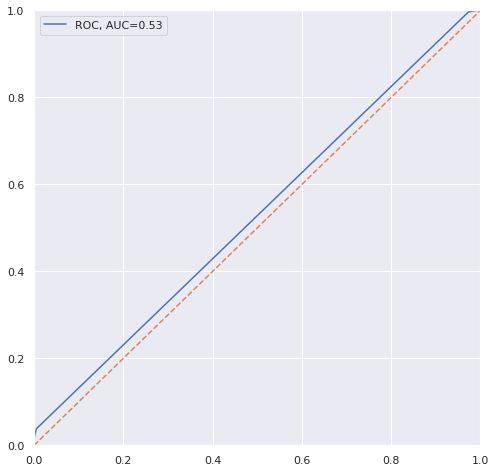

In [48]:
##训练模型
print("开始训练模型......")
from sklearn.ensemble import RandomForestClassifier
##2000颗树，特征数量为总数量的log2
rfc=RandomForestClassifier(n_estimators=2000, max_samples=0.8, max_features='log2')
rfc.fit(selected_feature,y)
print("模型训练完成......")
## 预测及概率
data['prob']=rfc.predict_proba(selected_feature)[:,1]
data['pred']=data['prob']>=0.5
## 计算指标
TP=np.sum(data['tag'] & data['pred'])
TN=np.sum((~data['tag'] & (~data['pred'])))
FP=np.sum((~data['tag'] & (data['pred'])))
FN=np.sum((data['tag']) & (~data['pred']))
print("预测完毕......")
print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(data['tag'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()